In [1]:
pip install --update holidays

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\Admin\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\Admin\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\Admin\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\Admin\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\Admin\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: --update


In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from datetime import date
import holidays


### To prepare the holidays for Prophet holiday parameters

In [3]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

### To load in training data and test data, which are 129 data and 24 data respectively

In [4]:
df_test=pd.read_csv("df_agg_test.csv")
df_test = df_test.drop(columns=['Unnamed: 0'])
df_test = df_test.loc[:23]
df_test
df_test.Month = pd.to_datetime(df_test.Month)
df_train=pd.read_csv("df_agg_train.csv")
df_train = df_train.drop(columns=['Unnamed: 0'])
df_train.Month = pd.to_datetime(df_train.Month)
df=df_train
df_train

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\460566025.py:5: UserWarning: Parsing '31/10/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_test.Month = pd.to_datetime(df_test.Month)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\460566025.py:5: UserWarning: Parsing '30/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_test.Month = pd.to_datetime(df_test.Month)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\460566025.py:5: UserWarning: Parsing '31/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_test.Month = pd.to_datetime(df_test.Month)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\460566025.py:5: UserWarning: Parsing '31/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_test.Month = pd.to_datetime(df_test.Month)
C:\Users\Adm

,Month,Tesla Monthly Revenue (Millions),IXIC,CL,Vehicle Sales,Household Income,Family Income,Capita Income
0,2009-04-30,8.981667,1641.147618,49.949524,822746,63573,77322,33430
1,2009-05-31,8.981667,1726.077496,59.212500,919295,63573,77322,33430
2,2009-06-30,8.981667,1826.988198,69.695455,850654,63573,77322,33430
3,2009-07-31,15.175667,1873.837735,64.293182,991950,63573,77322,33430
4,2009-08-31,15.175667,1997.155244,71.138572,1254982,63573,77322,33430
...,...,...,...,...,...,...,...,...
124,2019-08-31,2101.000000,7910.933239,54.844091,1628577,69638,85780,37803
125,2019-09-30,2101.000000,8087.699976,56.967000,1282712,69638,85780,37803
126,2019-10-31,2461.333333,8079.278299,54.005653,1384010,69638,85780,37803
127,2019-11-30,2461.333333,8517.577441,57.070000,1445173,69638,85780,37803


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             129 non-null    datetime64[ns]
 1   Tesla Monthly Revenue (Millions)  129 non-null    float64       
 2   IXIC                              129 non-null    float64       
 3   CL                                129 non-null    float64       
 4   Vehicle Sales                     129 non-null    int64         
 5   Household Income                  129 non-null    int64         
 6   Family Income                     129 non-null    int64         
 7   Capita Income                     129 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 8.2 KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             24 non-null     datetime64[ns]
 1   Tesla Monthly Revenue (Millions)  24 non-null     float64       
 2   IXIC                              24 non-null     float64       
 3   CL                                24 non-null     float64       
 4   Vehicle Sales                     24 non-null     int64         
 5   Household Income                  24 non-null     float64       
 6   Family Income                     24 non-null     float64       
 7   Capita Income                     24 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 1.6 KB


# Uni-Variate Forecasting - Prophet Model Training

In [7]:
df_train = df_train.rename(columns={'Tesla Monthly Revenue (Millions)': 'y', 'Month':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])


In [8]:
model = Prophet(holidays=holidays) #instantiate Prophet
model.add_country_holidays(country_name='US')
model.fit(df_train)

18:13:51 - cmdstanpy - INFO - Chain [1] start processing
18:13:52 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''


future_data = model.make_future_dataframe(periods=37, freq = 'M')

forecast_data = model.predict(future_data)
  
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
161,2022-09-30,9.345277,8.782478,9.942954
162,2022-10-31,9.512746,8.958624,10.110746
163,2022-11-30,9.516160,8.967136,10.077504
164,2022-12-31,9.524872,8.886940,10.147622
165,2023-01-31,9.406272,8.811811,9.986108


In [10]:
future_data

,ds
0,2009-04-30
1,2009-05-31
2,2009-06-30
3,2009-07-31
4,2009-08-31
...,...
161,2022-09-30
162,2022-10-31
163,2022-11-30
164,2022-12-31


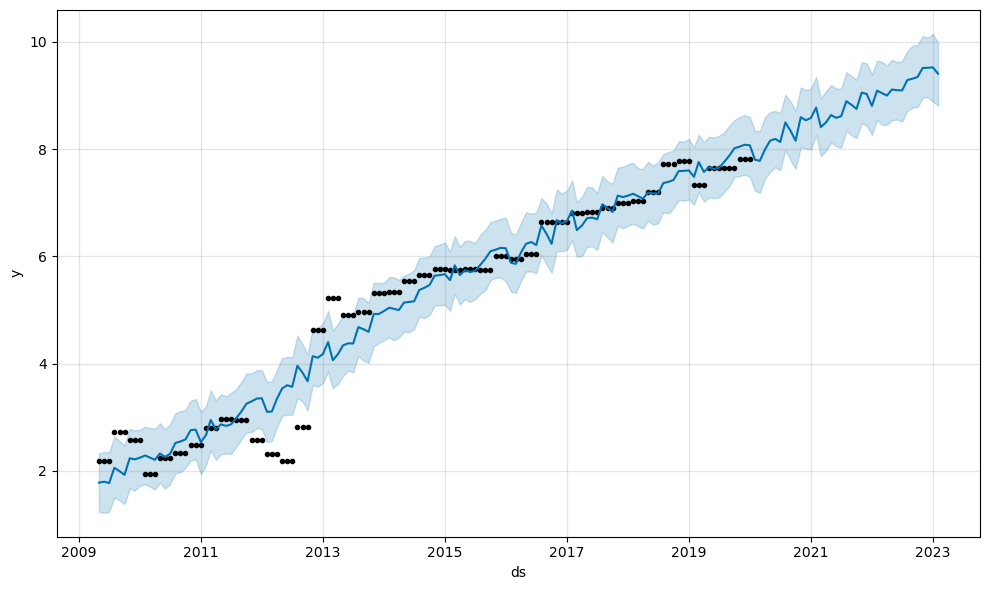

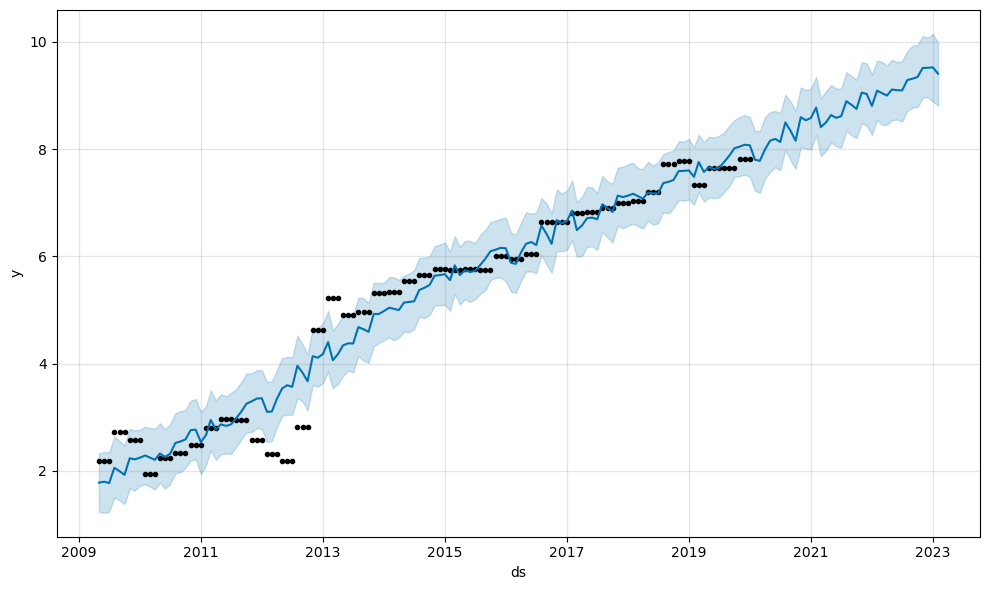

In [11]:
model.plot(forecast_data)

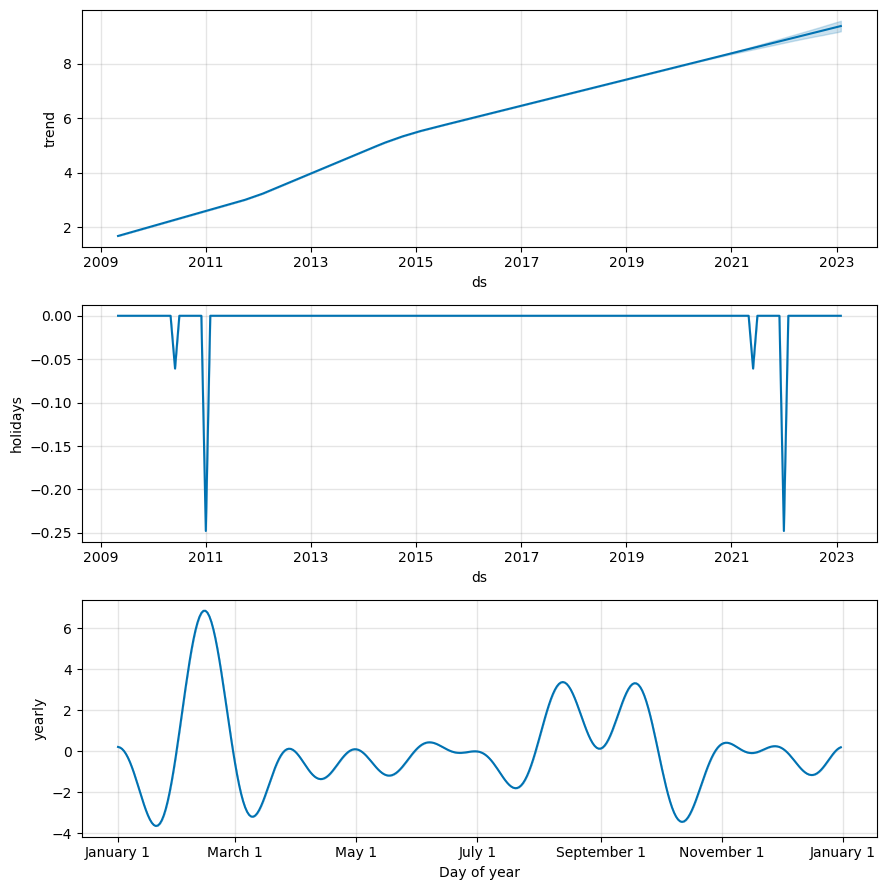

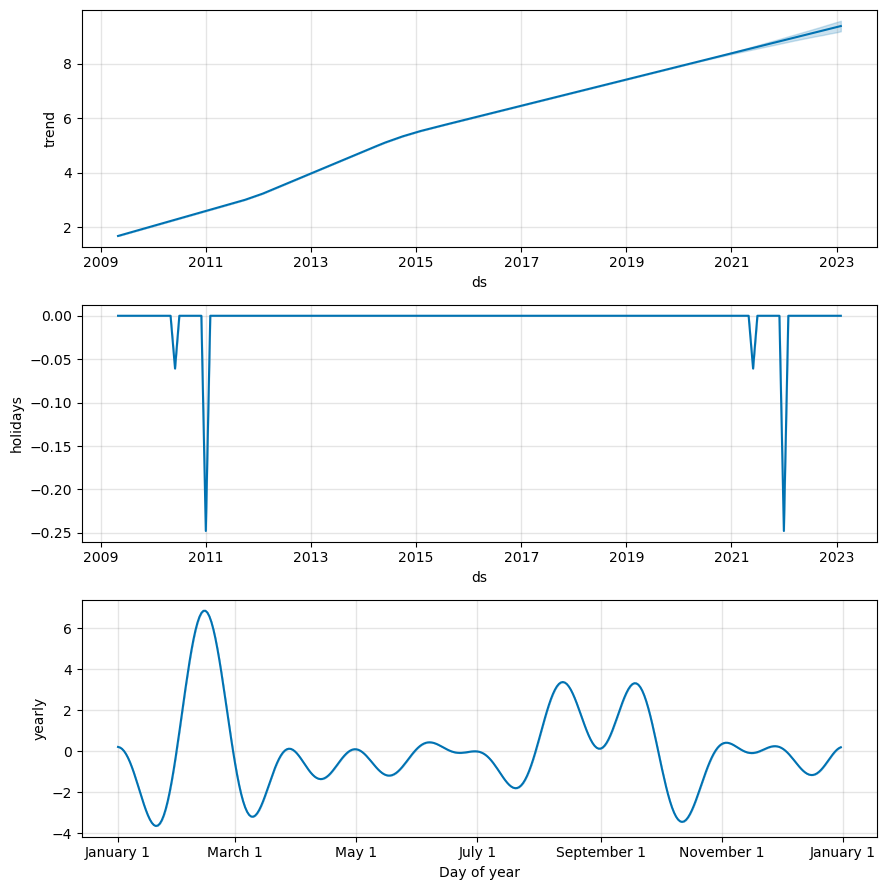

In [12]:
model.plot_components(forecast_data)

In [13]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

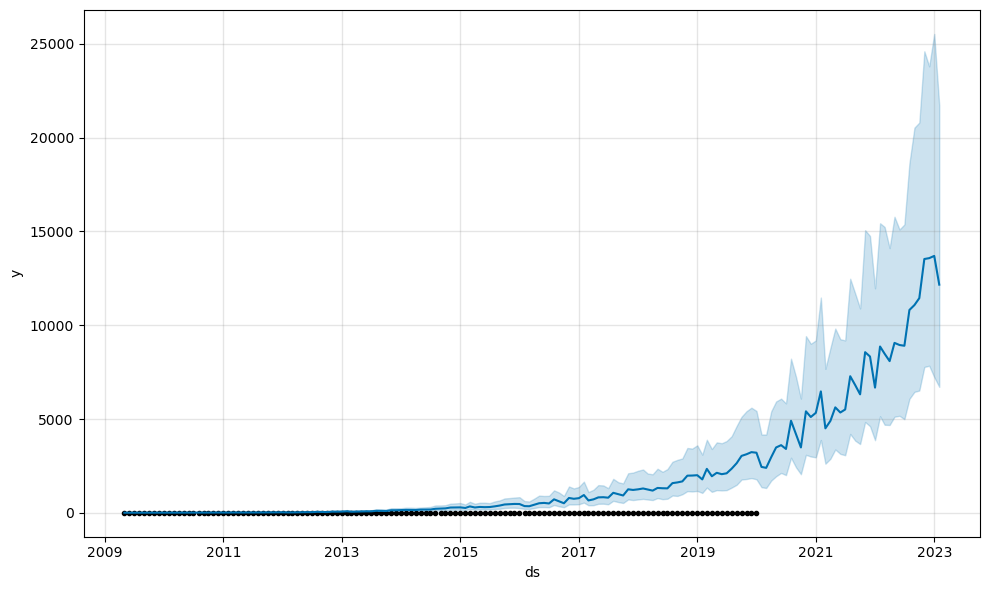

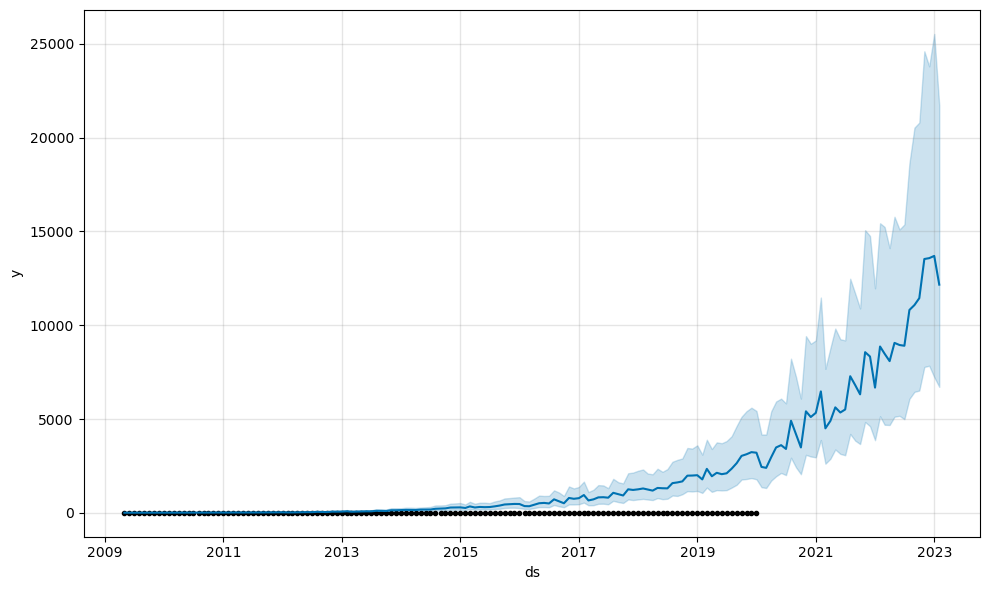

In [14]:
model.plot(forecast_data_orig)

In [15]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [16]:
df_train['y']

0         8.981667
1         8.981667
2         8.981667
3        15.175667
4        15.175667
          ...     
124    2101.000000
125    2101.000000
126    2461.333333
127    2461.333333
128    2461.333333
Name: y, Length: 129, dtype: float64

In [17]:
df_train['y_orig']

0         8.981667
1         8.981667
2         8.981667
3        15.175667
4        15.175667
          ...     
124    2101.000000
125    2101.000000
126    2461.333333
127    2461.333333
128    2461.333333
Name: y_orig, Length: 129, dtype: float64

In [18]:
df_test['Tesla Monthly Revenue (Millions)']

0     1995.000000
1     1995.000000
2     1995.000000
3     2012.000000
4     2012.000000
5     2012.000000
6     2923.666667
7     2923.666667
8     2923.666667
9     3581.333333
10    3581.333333
11    3581.333333
12    3463.000000
13    3463.000000
14    3463.000000
15    3986.000000
16    3986.000000
17    3986.000000
18    4585.666667
19    4585.666667
20    4585.666667
21    5906.333333
22    5906.333333
23    5906.333333
Name: Tesla Monthly Revenue (Millions), dtype: float64

In [19]:
forecast_data_orig[['ds','yhat']]

,ds,yhat
0,2009-04-30,5.950284
1,2009-05-31,6.048858
2,2009-06-30,5.895539
3,2009-07-31,7.837196
4,2009-08-31,7.364865
...,...,...
161,2022-09-30,11444.642348
162,2022-10-31,13531.097443
163,2022-11-30,13577.378964
164,2022-12-31,13696.175657


In [20]:
df_actual = pd.concat([df_train['y_orig'], df_test['Tesla Monthly Revenue (Millions)']])
df_actual

0        8.981667
1        8.981667
2        8.981667
3       15.175667
4       15.175667
         ...     
19    4585.666667
20    4585.666667
21    5906.333333
22    5906.333333
23    5906.333333
Length: 153, dtype: float64

In [21]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_actual, name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [22]:
final_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,superbowl,superbowl_lower,superbowl_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-04-30,1.684191,3.449996,10.250193,1.684191,1.684191,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.099248,0.099248,0.099248,0.0,0.0,0.0,5.950284
1,2009-05-31,1.730590,3.388929,10.541611,1.730590,1.730590,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.069280,0.069280,0.069280,0.0,0.0,0.0,6.048858
2,2009-06-30,1.775492,3.450225,10.438710,1.775492,1.775492,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.001296,-0.001296,-0.001296,0.0,0.0,0.0,5.895539
3,2009-07-31,1.821892,4.498921,14.022828,1.821892,1.821892,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.236989,0.236989,0.236989,0.0,0.0,0.0,7.837196
4,2009-08-31,1.868291,4.261505,12.953296,1.868291,1.868291,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.128430,0.128430,0.128430,0.0,0.0,0.0,7.364865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2022-09-30,9.216476,6519.012031,20805.121365,9.051823,9.375514,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.128801,0.128801,0.128801,0.0,0.0,0.0,11444.642348
162,2022-10-31,9.257248,7774.651338,24606.007156,9.088036,9.426004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.255498,0.255498,0.255498,0.0,0.0,0.0,13531.097443
163,2022-11-30,9.296706,7841.111372,23801.492747,9.117620,9.473602,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.219455,0.219455,0.219455,0.0,0.0,0.0,13577.378964
164,2022-12-31,9.337478,7236.843454,25530.327360,9.148149,9.523849,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.187394,0.187394,0.187394,0.0,0.0,0.0,13696.175657


In [23]:
df_test.head(5)

,Month,Tesla Monthly Revenue (Millions),IXIC,CL,Vehicle Sales,Household Income,Family Income,Capita Income
0,2020-01-31,1995.0,9233.359980,57.528572,1157415,70877.0,87269.0,38730.0
1,2020-02-29,1995.0,9418.850021,50.542105,1434716,70877.0,87269.0,38730.0
2,2020-03-31,1995.0,7772.205833,30.445455,944850,70877.0,87269.0,38730.0
3,2020-04-30,2012.0,8292.407180,16.699048,563122,70877.0,87269.0,38730.0
4,2020-05-31,2012.0,9105.655469,28.527500,1181756,70877.0,87269.0,38730.0


In [24]:
final_df.tail(113)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,superbowl,superbowl_lower,superbowl_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
53,2013-09-30,4.580203,55.570802,168.907018,4.580203,4.580203,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.014383,0.014383,0.014383,0.0,0.0,0.0,98.947109
54,2013-10-31,4.648710,75.272258,246.916036,4.648710,4.648710,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.278152,0.278152,0.278152,0.0,0.0,0.0,137.945975
55,2013-11-30,4.715007,80.168828,246.110392,4.715007,4.715007,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.211314,0.211314,0.211314,0.0,0.0,0.0,137.871307
56,2013-12-31,4.783514,84.534199,245.621014,4.783514,4.783514,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.196578,0.196578,0.196578,0.0,0.0,0.0,145.487771
57,2014-01-31,4.852021,89.384631,273.110229,4.852021,4.852021,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.191825,0.191825,0.191825,0.0,0.0,0.0,155.065282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2022-09-30,9.216476,6519.012031,20805.121365,9.051823,9.375514,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.128801,0.128801,0.128801,0.0,0.0,0.0,11444.642348
162,2022-10-31,9.257248,7774.651338,24606.007156,9.088036,9.426004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.255498,0.255498,0.255498,0.0,0.0,0.0,13531.097443
163,2022-11-30,9.296706,7841.111372,23801.492747,9.117620,9.473602,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.219455,0.219455,0.219455,0.0,0.0,0.0,13577.378964
164,2022-12-31,9.337478,7236.843454,25530.327360,9.148149,9.523849,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.187394,0.187394,0.187394,0.0,0.0,0.0,13696.175657


In [25]:
rows = final_df["yhat"].tail(24)

In [26]:
rows = rows.reset_index()

In [27]:
rows.pop('index')

0     142
1     143
2     144
3     145
4     146
5     147
6     148
7     149
8     150
9     151
10    152
11    153
12    154
13    155
14    156
15    157
16    158
17    159
18    160
19    161
20    162
21    163
22    164
23    165
Name: index, dtype: int64

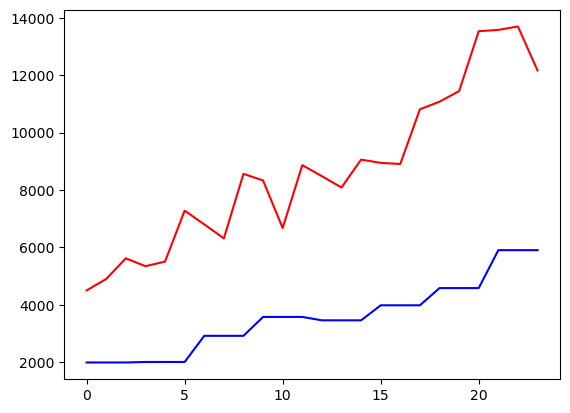

In [28]:
# plot

import matplotlib.pyplot as plt
plt.plot(df_test['Tesla Monthly Revenue (Millions)'], color = 'blue')   
plt.plot(rows, color='red')
plt.show()

# Multi-Variate Forecasting - Prophet Model Training

In [29]:
df_test=pd.read_csv("df_agg_test.csv")
df_test = df_test.drop(columns=['Unnamed: 0'])
df_test = df_test.loc[:23]
df_test
df_test.Month = pd.to_datetime(df_test.Month)
df_train=pd.read_csv("df_agg_train.csv")
df_train = df_train.drop(columns=['Unnamed: 0'])
df_train.Month = pd.to_datetime(df_train.Month)
df=df_train
df_train

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\460566025.py:5: UserWarning:

Parsing '31/10/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\460566025.py:5: UserWarning:

Parsing '30/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\460566025.py:5: UserWarning:

Parsing '31/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\460566025.py:5: UserWarning:

Parsing '31/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\460566025.py:5: UserWarning:

Parsing '30/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsi

,Month,Tesla Monthly Revenue (Millions),IXIC,CL,Vehicle Sales,Household Income,Family Income,Capita Income
0,2009-04-30,8.981667,1641.147618,49.949524,822746,63573,77322,33430
1,2009-05-31,8.981667,1726.077496,59.212500,919295,63573,77322,33430
2,2009-06-30,8.981667,1826.988198,69.695455,850654,63573,77322,33430
3,2009-07-31,15.175667,1873.837735,64.293182,991950,63573,77322,33430
4,2009-08-31,15.175667,1997.155244,71.138572,1254982,63573,77322,33430
...,...,...,...,...,...,...,...,...
124,2019-08-31,2101.000000,7910.933239,54.844091,1628577,69638,85780,37803
125,2019-09-30,2101.000000,8087.699976,56.967000,1282712,69638,85780,37803
126,2019-10-31,2461.333333,8079.278299,54.005653,1384010,69638,85780,37803
127,2019-11-30,2461.333333,8517.577441,57.070000,1445173,69638,85780,37803


### From EDA, the IXIC (NASDAQ Composite) is the most highly correlated to the Tesla Revenue, so we only try to add regressor to  IXIC for further multivariate analysis.

In [30]:
df_train = df_train.rename(columns={'Tesla Monthly Revenue (Millions)': 'y', 'Month':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])


model_new = Prophet(holidays=holidays) #instantiate Prophet
model_new.add_country_holidays(country_name='US')
#model_new = Prophet() #instantiate Prophet
model_new.add_regressor('IXIC')
#model_new.add_regressor('CL')
#model_new.add_regressor('Vehicle Sales')
#model_new.add_regressor('Household Income')
#model_new.add_regressor('Family Income')
#model_new.add_regressor('Capita Income')

In [31]:
df_train

,ds,y,IXIC,CL,Vehicle Sales,Household Income,Family Income,Capita Income,y_orig
0,2009-04-30,2.195185,1641.147618,49.949524,822746,63573,77322,33430,8.981667
1,2009-05-31,2.195185,1726.077496,59.212500,919295,63573,77322,33430,8.981667
2,2009-06-30,2.195185,1826.988198,69.695455,850654,63573,77322,33430,8.981667
3,2009-07-31,2.719693,1873.837735,64.293182,991950,63573,77322,33430,15.175667
4,2009-08-31,2.719693,1997.155244,71.138572,1254982,63573,77322,33430,15.175667
...,...,...,...,...,...,...,...,...,...
124,2019-08-31,7.650169,7910.933239,54.844091,1628577,69638,85780,37803,2101.000000
125,2019-09-30,7.650169,8087.699976,56.967000,1282712,69638,85780,37803,2101.000000
126,2019-10-31,7.808458,8079.278299,54.005653,1384010,69638,85780,37803,2461.333333
127,2019-11-30,7.808458,8517.577441,57.070000,1445173,69638,85780,37803,2461.333333


In [32]:
model_new.fit(df_train)

''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data= model_new.make_future_dataframe(periods=36, freq = 'M')

18:13:57 - cmdstanpy - INFO - Chain [1] start processing
18:13:57 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future_data

,ds
0,2009-04-30
1,2009-05-31
2,2009-06-30
3,2009-07-31
4,2009-08-31
...,...
160,2022-08-31
161,2022-09-30
162,2022-10-31
163,2022-11-30


In [34]:
df_test = df_test.rename(columns={'Tesla Monthly Revenue (Millions)': 'y', 'Month':'ds'})

In [35]:
df_test['y_orig'] = df_test['y'] # to save a copy of the original data..you'll see why shortly. 
df_test['y'] = np.log(df_test['y'])

In [36]:
df=pd.concat([df_train,df_test])
df.tail(30)


,ds,y,IXIC,CL,Vehicle Sales,Household Income,Family Income,Capita Income,y_orig
123,2019-07-31,7.650169,8205.598677,57.546364,1417418,69638.0,85780.0,37803.0,2101.000000
124,2019-08-31,7.650169,7910.933239,54.844091,1628577,69638.0,85780.0,37803.0,2101.000000
125,2019-09-30,7.650169,8087.699976,56.967000,1282712,69638.0,85780.0,37803.0,2101.000000
126,2019-10-31,7.808458,8079.278299,54.005653,1384010,69638.0,85780.0,37803.0,2461.333333
127,2019-11-30,7.808458,8517.577441,57.070000,1445173,69638.0,85780.0,37803.0,2461.333333
128,2019-12-31,7.808458,8778.591936,59.804762,1459164,69638.0,85780.0,37803.0,2461.333333
0,2020-01-31,7.598399,9233.359980,57.528572,1157415,70877.0,87269.0,38730.0,1995.000000
1,2020-02-29,7.598399,9418.850021,50.542105,1434716,70877.0,87269.0,38730.0,1995.000000
2,2020-03-31,7.598399,7772.205833,30.445455,944850,70877.0,87269.0,38730.0,1995.000000
3,2020-04-30,7.606885,8292.407180,16.699048,563122,70877.0,87269.0,38730.0,2012.000000


In [37]:
future_data=df[['ds','IXIC']]

In [38]:
future_data

,ds,IXIC
0,2009-04-30,1641.147618
1,2009-05-31,1726.077496
2,2009-06-30,1826.988198
3,2009-07-31,1873.837735
4,2009-08-31,1997.155244
...,...,...
19,2021-08-31,14856.517710
20,2021-09-30,15023.538550
21,2021-10-31,14879.012320
22,2021-11-30,15814.932900


In [39]:
forecast_data = model_new.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper','IXIC']].tail(5)

,ds,yhat,yhat_lower,yhat_upper,IXIC
148,2021-08-31,8.839056,8.270188,9.428803,0.004991
149,2021-09-30,8.781989,8.174412,9.374415,0.005071
150,2021-10-31,9.064839,8.470162,9.701826,0.005001
151,2021-11-30,9.048798,8.491462,9.589980,0.005455
152,2021-12-31,8.652689,8.073580,9.256015,0.005290


In [40]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,superbowl,superbowl_lower,superbowl_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-04-30,1.712231,1.211425,2.337894,1.712231,1.712231,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.064780,0.064780,0.064780,0.0,0.0,0.0,1.775604
1,2009-05-31,1.759418,1.211466,2.343018,1.759418,1.759418,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.032404,0.032404,0.032404,0.0,0.0,0.0,1.790455
2,2009-06-30,1.805083,1.186425,2.353159,1.805083,1.805083,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.036264,-0.036264,-0.036264,0.0,0.0,0.0,1.767502
3,2009-07-31,1.852270,1.505380,2.583366,1.852270,1.852270,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.189709,0.189709,0.189709,0.0,0.0,0.0,2.040685
4,2009-08-31,1.899457,1.426236,2.597044,1.899457,1.899457,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.091459,0.091459,0.091459,0.0,0.0,0.0,1.989681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2021-08-31,8.742606,8.270188,9.428803,8.671253,8.812874,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.091459,0.091459,0.091459,0.0,0.0,0.0,8.839056
149,2021-09-30,8.782258,8.174412,9.374415,8.703502,8.857407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.005341,-0.005341,-0.005341,0.0,0.0,0.0,8.781989
150,2021-10-31,8.823232,8.470162,9.701826,8.740713,8.903053,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.236605,0.236605,0.236605,0.0,0.0,0.0,9.064839
151,2021-11-30,8.862884,8.491462,9.589980,8.772474,8.948218,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.180459,0.180459,0.180459,0.0,0.0,0.0,9.048798


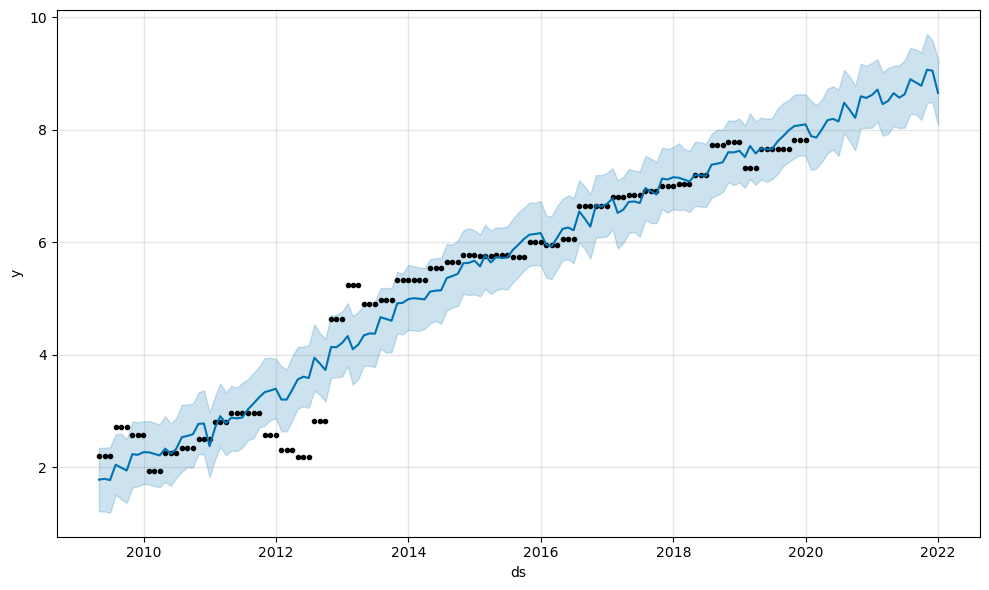

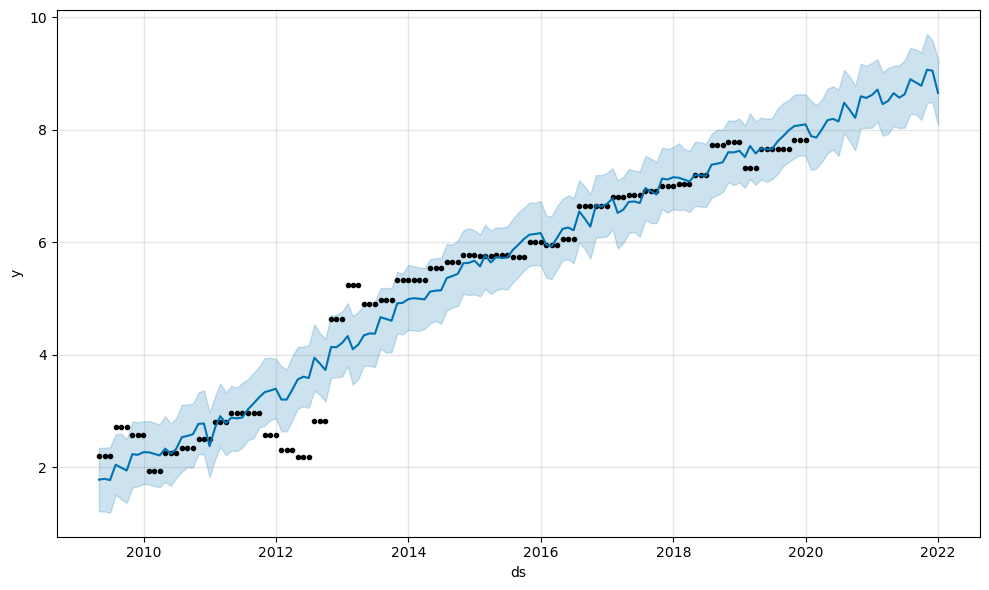

In [41]:
model_new.plot(forecast_data)

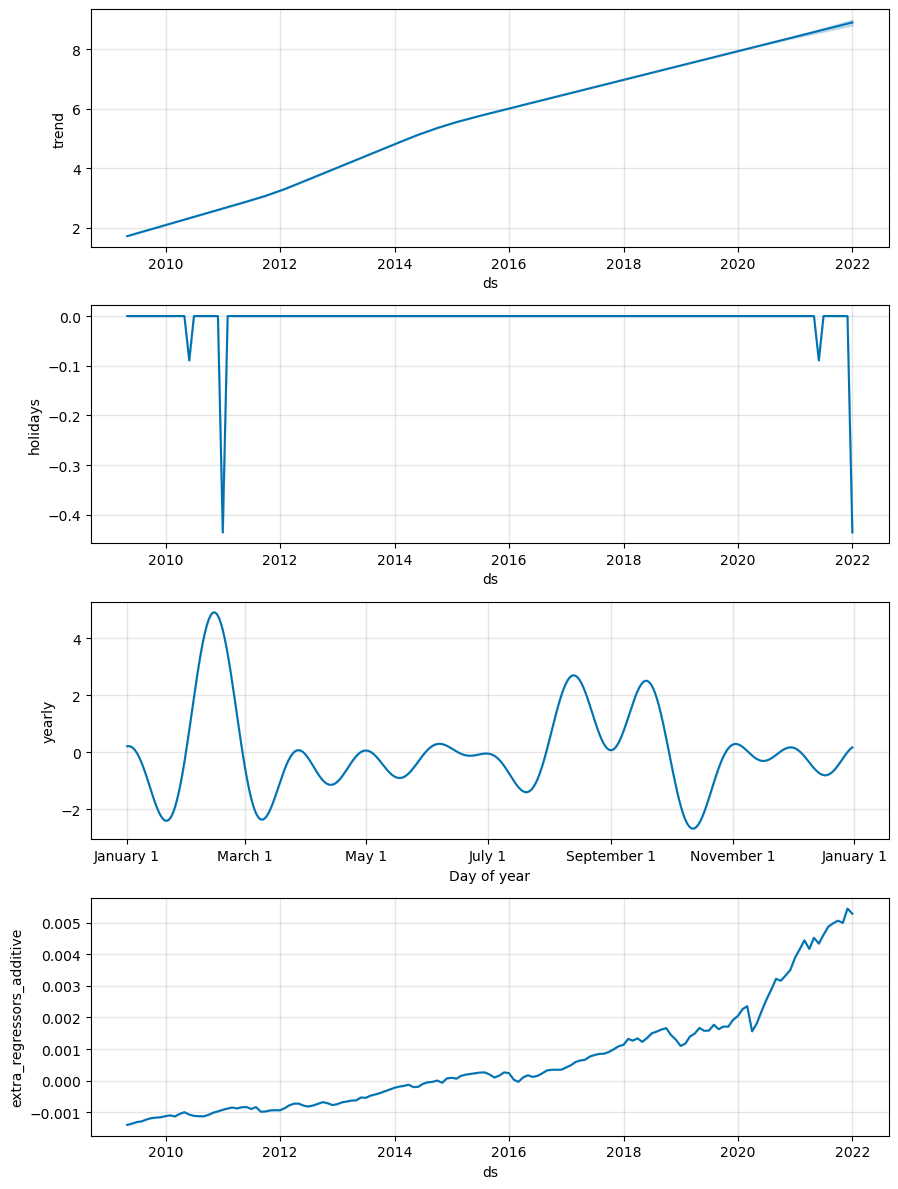

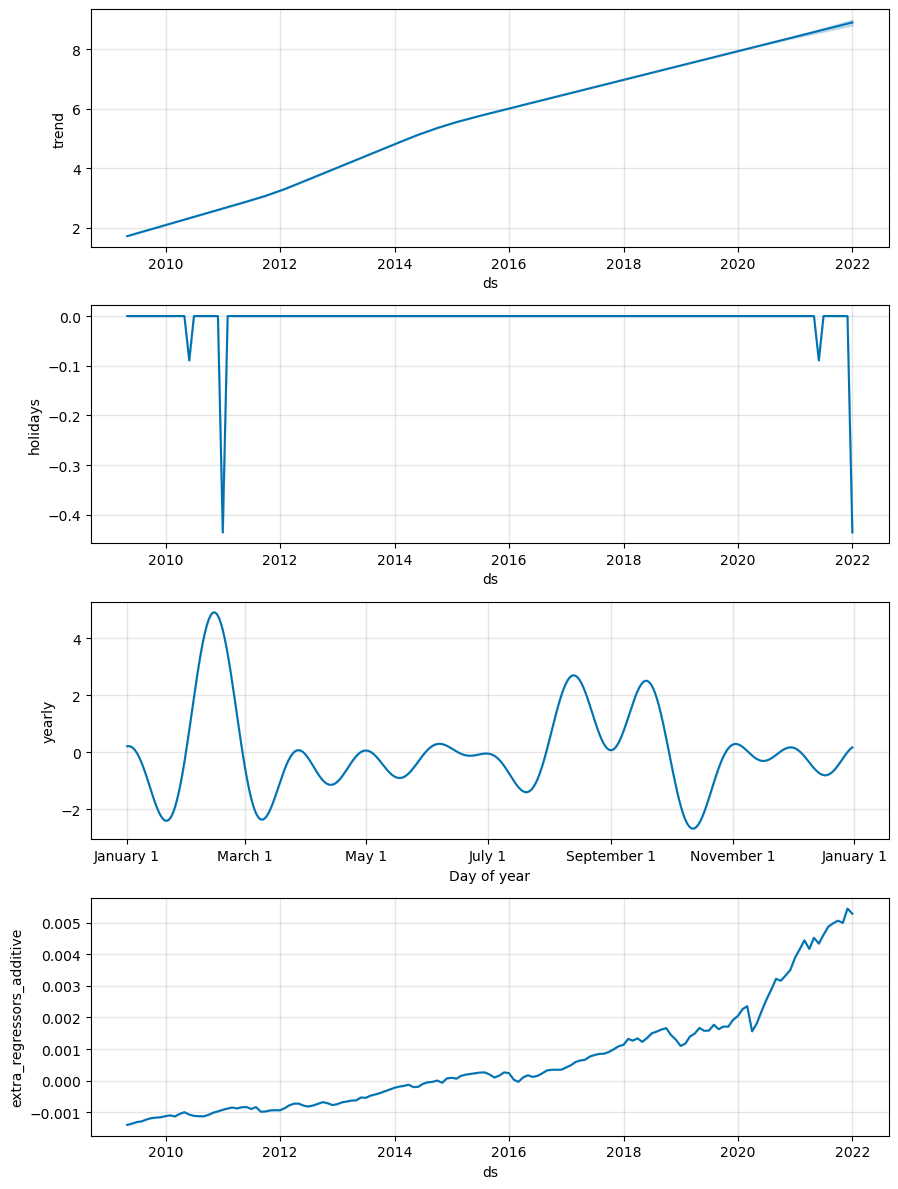

In [42]:
model_new.plot_components(forecast_data)

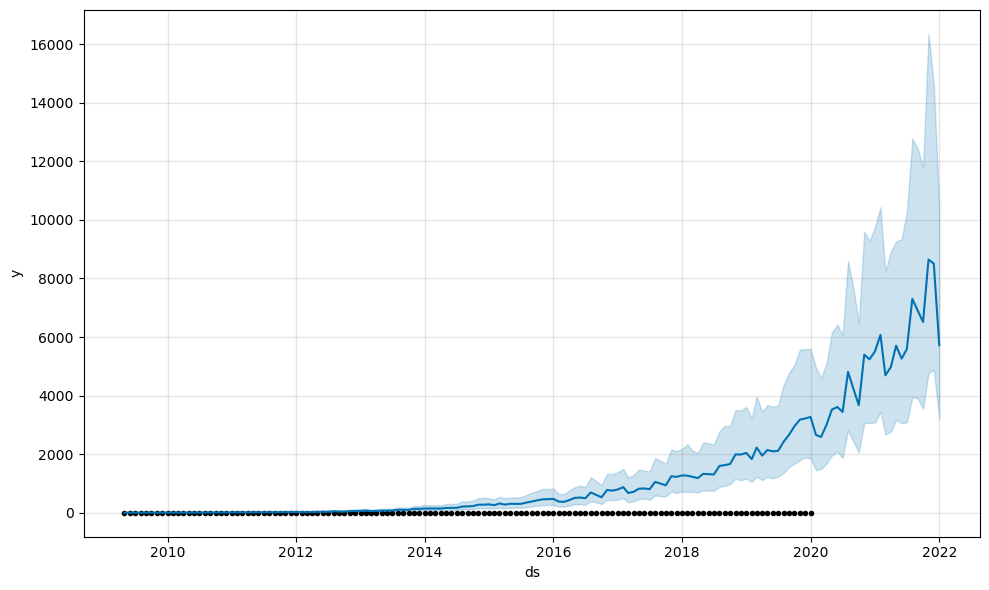

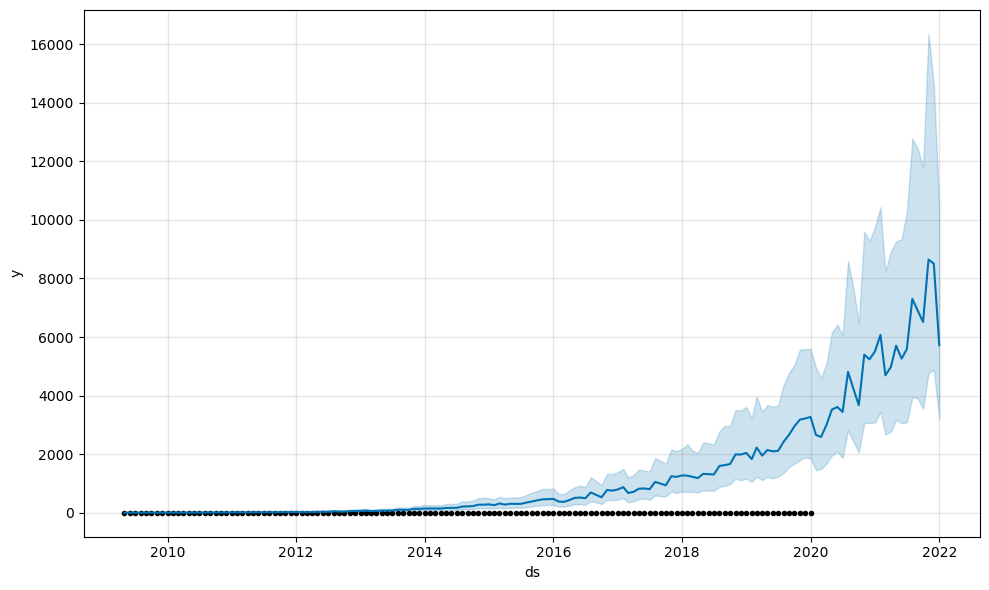

In [43]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [44]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [45]:
df_actual = pd.concat([df_train['y_orig'], df_test['y_orig']] )
df_actual

0        8.981667
1        8.981667
2        8.981667
3       15.175667
4       15.175667
         ...     
19    4585.666667
20    4585.666667
21    5906.333333
22    5906.333333
23    5906.333333
Name: y_orig, Length: 153, dtype: float64

In [46]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_actual, name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [47]:
final_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,superbowl,superbowl_lower,superbowl_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-04-30,1.712231,3.358266,10.359393,1.712231,1.712231,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.064780,0.064780,0.064780,0.0,0.0,0.0,5.903846
1,2009-05-31,1.759418,3.358404,10.412612,1.759418,1.759418,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.032404,0.032404,0.032404,0.0,0.0,0.0,5.992181
2,2009-06-30,1.805083,3.275351,10.518744,1.805083,1.805083,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.036264,-0.036264,-0.036264,0.0,0.0,0.0,5.856207
3,2009-07-31,1.852270,4.505866,13.241638,1.852270,1.852270,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.189709,0.189709,0.189709,0.0,0.0,0.0,7.695876
4,2009-08-31,1.899457,4.163000,13.423995,1.899457,1.899457,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.091459,0.091459,0.091459,0.0,0.0,0.0,7.313203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2021-08-31,8.742606,3905.684942,12441.623551,8.671253,8.812874,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.091459,0.091459,0.091459,0.0,0.0,0.0,6898.479631
149,2021-09-30,8.782258,3548.969092,11783.020147,8.703502,8.857407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.005341,-0.005341,-0.005341,0.0,0.0,0.0,6515.823014
150,2021-10-31,8.823232,4770.287157,16347.431276,8.740713,8.903053,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.236605,0.236605,0.236605,0.0,0.0,0.0,8645.884869
151,2021-11-30,8.862884,4872.987461,14617.576479,8.772474,8.948218,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.180459,0.180459,0.180459,0.0,0.0,0.0,8508.307944


In [48]:
df_actual

0        8.981667
1        8.981667
2        8.981667
3       15.175667
4       15.175667
         ...     
19    4585.666667
20    4585.666667
21    5906.333333
22    5906.333333
23    5906.333333
Name: y_orig, Length: 153, dtype: float64

In [49]:
final_df["yhat"]

0         5.903846
1         5.992181
2         5.856207
3         7.695876
4         7.313203
          ...     
148    6898.479631
149    6515.823014
150    8645.884869
151    8508.307944
152    5725.521880
Name: yhat, Length: 153, dtype: float64

In [50]:
#cv_results = cross_validation( model = model_new, initial='129 months', period='24 months', horizon = '24 months')

In [51]:
#cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
#df_cv = cross_validation(model=model_new, cutoffs=cutoffs, period= ,horizon='33 months')

In [52]:
#from prophet.diagnostics import performance_metrics
#df_p = performance_metrics(df_cv)
#df_p.head()

## Hyperparameter Tuning

https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning

In [53]:
df

,ds,y,IXIC,CL,Vehicle Sales,Household Income,Family Income,Capita Income,y_orig
0,2009-04-30,2.195185,1641.147618,49.949524,822746,63573.0,77322.0,33430.0,8.981667
1,2009-05-31,2.195185,1726.077496,59.212500,919295,63573.0,77322.0,33430.0,8.981667
2,2009-06-30,2.195185,1826.988198,69.695455,850654,63573.0,77322.0,33430.0,8.981667
3,2009-07-31,2.719693,1873.837735,64.293182,991950,63573.0,77322.0,33430.0,15.175667
4,2009-08-31,2.719693,1997.155244,71.138572,1254982,63573.0,77322.0,33430.0,15.175667
...,...,...,...,...,...,...,...,...,...
19,2021-08-31,8.430691,14856.517710,67.711363,1095528,69717.0,85806.0,38332.0,4585.666667
20,2021-09-30,8.430691,15023.538550,71.544762,1094535,69717.0,85806.0,38332.0,4585.666667
21,2021-10-31,8.683781,14879.012320,81.222858,1094817,69717.0,85806.0,38332.0,5906.333333
22,2021-11-30,8.683781,15814.932900,78.625454,1040310,69717.0,85806.0,38332.0,5906.333333


In [54]:
df_train

,ds,y,IXIC,CL,Vehicle Sales,Household Income,Family Income,Capita Income,y_orig,y_log
0,2009-04-30,8.981667,1641.147618,49.949524,822746,63573,77322,33430,8.981667,2.195185
1,2009-05-31,8.981667,1726.077496,59.212500,919295,63573,77322,33430,8.981667,2.195185
2,2009-06-30,8.981667,1826.988198,69.695455,850654,63573,77322,33430,8.981667,2.195185
3,2009-07-31,15.175667,1873.837735,64.293182,991950,63573,77322,33430,15.175667,2.719693
4,2009-08-31,15.175667,1997.155244,71.138572,1254982,63573,77322,33430,15.175667,2.719693
...,...,...,...,...,...,...,...,...,...,...
124,2019-08-31,2101.000000,7910.933239,54.844091,1628577,69638,85780,37803,2101.000000,7.650169
125,2019-09-30,2101.000000,8087.699976,56.967000,1282712,69638,85780,37803,2101.000000,7.650169
126,2019-10-31,2461.333333,8079.278299,54.005653,1384010,69638,85780,37803,2461.333333,7.808458
127,2019-11-30,2461.333333,8517.577441,57.070000,1445173,69638,85780,37803,2461.333333,7.808458


In [55]:
cutoffs = pd.to_datetime(['2012-12-31', '2015-12-31', '2018-12-31'])

In [56]:
# Python
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

In [57]:
# Use cross validation to evaluate all parameters
for params in all_params:
    #m = model_new.fit(df_train)
    m = Prophet(**params).fit(df_train)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='90 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=12)
    rmses.append(df_p['rmse'].values[0])

18:14:00 - cmdstanpy - INFO - Chain [1] start processing
18:14:00 - cmdstanpy - INFO - Chain [1] done processing
18:14:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
18:14:00 - cmdstanpy - INFO - Chain [1] start processing
18:14:01 - cmdstanpy - INFO - Chain [1] done processing
18:14:07 - cmdstanpy - INFO - Chain [1] start processing
18:14:08 - cmdstanpy - INFO - Chain [1] done processing
18:14:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
18:14:08 - cmdstanpy - INFO - Chain [1] start processing
18:14:08 - cmdstanpy - INFO - Chain [1] done processing
18:14:15 - cmdstanpy - INFO - Chain [1] start processing
18:14:15 - cmdstanpy - INFO - Chain [1] done processing
18:14:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newto

In [58]:
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale        rmse
0                     0.001                     0.01  186.706670
1                     0.001                     0.10  220.966012
2                     0.001                     1.00  219.790400
3                     0.001                    10.00  222.547259
4                     0.010                     0.01  185.890958
5                     0.010                     0.10  218.551164
6                     0.010                     1.00  220.808598
7                     0.010                    10.00  221.871604
8                     0.100                     0.01  384.675719
9                     0.100                     0.10  374.721964
10                    0.100                     1.00  374.902336
11                    0.100                    10.00  373.908007
12                    0.500                     0.01  442.521738
13                    0.500                     0.10  432.466989
14                    0.5

In [59]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


### Prophet(changepoint_prior_scale=0.01, seasonality_prior_scale=0.01) is the optimal parameters since the rmse is the lowest

In [60]:
cutoffs = pd.to_datetime(['2012-12-31', '2015-12-31', '2018-12-31'])
df_cv = cross_validation(m, cutoffs=cutoffs, horizon='90 days')

  0%|          | 0/3 [00:00<?, ?it/s]

18:15:46 - cmdstanpy - INFO - Chain [1] start processing
18:15:46 - cmdstanpy - INFO - Chain [1] done processing
18:15:47 - cmdstanpy - INFO - Chain [1] start processing
18:15:47 - cmdstanpy - INFO - Chain [1] done processing
18:15:48 - cmdstanpy - INFO - Chain [1] start processing
18:15:48 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,31 days,146524.024277,382.784566,262.822926,0.377441,0.429996,0.465244,0.333333
1,59 days,251841.669501,501.838290,395.732525,0.465291,0.465291,0.491900,0.000000
2,60 days,45.605574,6.753190,6.753190,0.017662,0.017662,0.017508,1.000000
3,90 days,281992.716648,531.029864,411.041555,0.446636,0.446636,0.447658,0.000000


### Cross validation performance 

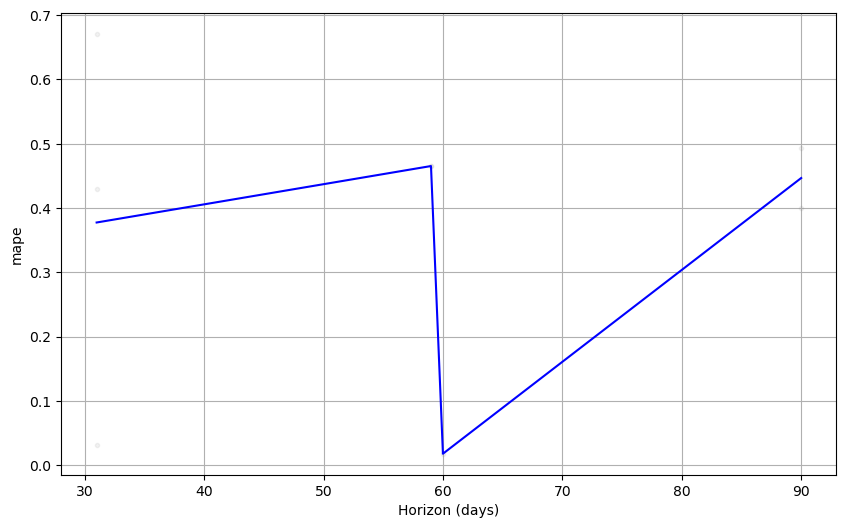

In [62]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')